In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [3]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [4]:
import matplotlib.pyplot as plt
import numpy as np

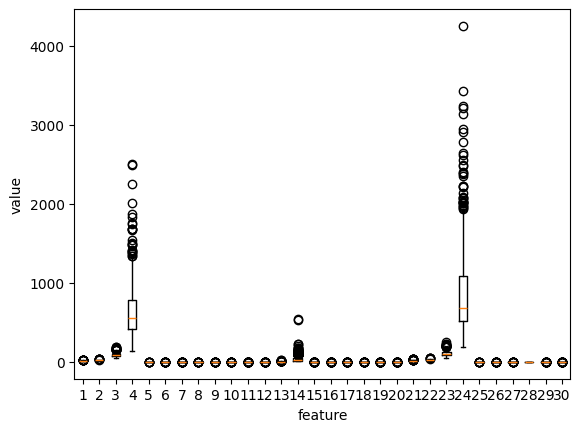

In [5]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [6]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [7]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [8]:
x = cancer.data
y = cancer.target

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

### stratify
- 훈련 데이터를 나눌 때 클래스 비율을 동일하게 만듦
- train_test_split() 함수는 기본적으로 데이터를 나누기 전에 섞지만 일부 클래스 비율이 불균형할 경우 stratify를 y로 지정해야 한다

### test_size
- `train_test_split`은 기본적으로 훈련 데이터 세트를 75:25 비율로 나눔
- 변경을 원할 시, 해당 매개변수에 테스트 세트의 비율을 전달하여 조절 가능

### random_state
- `train_test_split`은 함수를 무작위로 데이터 세트를 섞은 다음 나눔
- 하지만 나눈 결과가 항상 일정하도록 유지하기 위해 난수 초깃값 지정해줌
- 실전에선 사용할 이유 없음

In [13]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

## 로지스틱 회귀 구현
1. 정방향으로 데이터가 흐르는 과정
2. 가중치를 업데이트 하기 위해 역방향으로 데이터가 흘러가는 과정

In [16]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backdrop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치 초기화
    self.b = 0 # 절편 초기화
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y_i - a) # 오차 계산
        w_grad, b_grad = self.backdrop(x_i, err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용
    a = self.activation(np.array(z)) # 활성화 함수 적용
    return a > 0.5 # 계단 함수 적용

In [17]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

<ipython-input-16-9df5741d38bd>:16: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


In [18]:
np.mean(neuron.predict(x_test) == y_test)

<ipython-input-16-9df5741d38bd>:16: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


np.float64(0.8245614035087719)

## 단일층 신경망
- 일반적으로 신경망은 '입력층', '은닉층', '출력층' 으로 구성
- 앞서 배운 로지스틱 회귀는 은닉층이 없는 신경망
- 단일층 신경망이란, 이러한 은닝층이 없는 신경망을 의미함

방금 한게 사실 단일층 신경망의 역할을 수행할 수 있음  
다만 더 기능을 추가하기 위해 단일층 신경망을 구성하는 것  
예를 들면, 선형 회귀나 로지스틱 회귀는 모두 경사 하강법을 사용했는데, 이는 손실 함수(제곱 오차 손실함수, 로지스틱 함수)의 결괏값을 최소화 하는 방향으로 가중치를 업데이트 한 것.  
해당 기능을 추가해 보자.

In [ ]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = [] # 손실함수의 결괏값 저장 기능 추가

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backdrop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치 초기화
    self.b = 0 # 절편 초기화
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y_i - a) # 오차 계산
        w_grad, b_grad = self.backdrop(x_i, err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트

        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 에포크마다 평균 손실 저장

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용
    a = self.activation(np.array(z)) # 활성화 함수 적용
    return a > 0.5 # 계단 함수 적용

### 여러가지 경사하강법
지금까지 사용한 경사하강법은 샘플 데이터 1개에 대한 그레이디언트 계산한 것  
이것을 **확률적 경사 하강법(stochastic gradient descent)**라고 함  

- 전체 훈련 세트를 사용하여 한 번에 그레디언트 계산: **배치 경사 하강법(batch gradient descent)**
- 배치 크기를 작게 하여 처리하는 방식: **미니 배치 경사 하강법(mini-batch gradient descent)**

확률적 경사 하강법은 데이터 1개마다 그레디언트를 계산하여 가중치를 업데이트하므로 계산 비용이 적지만, 가중치가 최적값에 수렴하는 과정이 불안정할 수 있음. 배치 경사 하강법은 전체 훈련 데이터 세트르 사용하여 한 번에 계산하여 최적값으로 수렴하는 과정이 안정적일 수 있지만 계산 비용이 크다  
이를 절충하기 위해 미니 배치 경사 하강법  

이를 사용하면 확률적 경사 하강법보다는 매끄럽고 배치 경사 하강법보다는 덜 매끄러운 형태로 수렴함(그래프로 그리면 확인 가능)  


In [19]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = [] # 손실함수의 결괏값 저장 기능 추가

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backdrop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치 초기화
    self.b = 0 # 절편 초기화
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # 인덱스 섞기

      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backdrop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad

        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)




In [22]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

<ipython-input-19-dc78c05f3abe>:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


np.float64(0.9298245614035088)

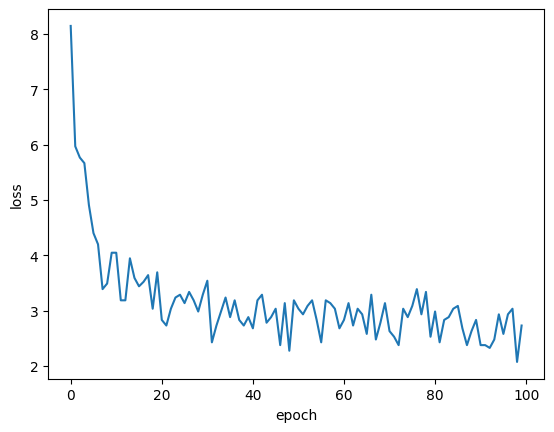

In [23]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [26]:
# 사이킷런으로 경사 하강법 적용하기
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)

In [27]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)


0.8333333333333334

In [28]:
sgd.predict(x_test[:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])